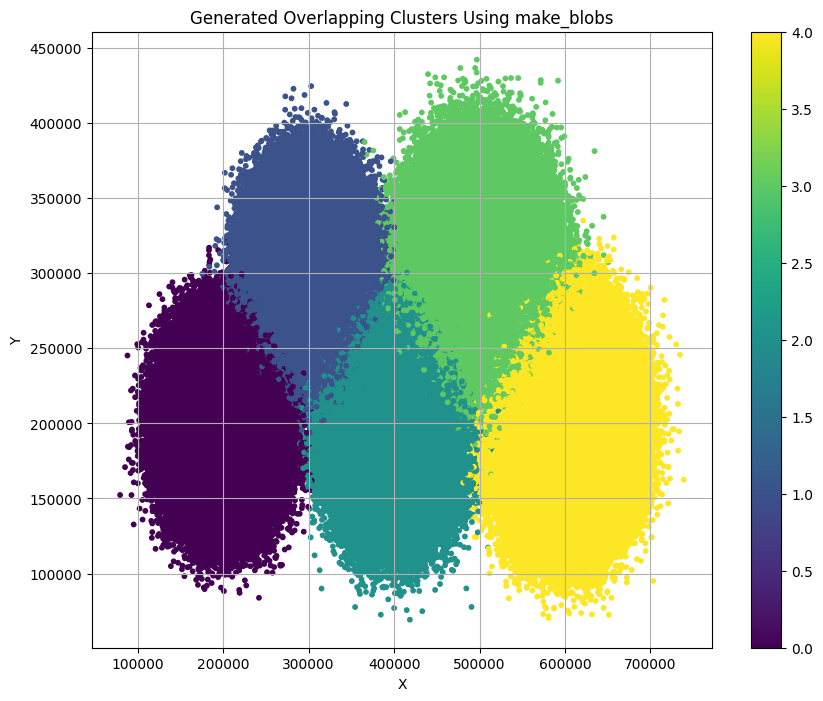

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import random

# Define cluster centers (similar to means in your original setup)
centers = [
    [200000, 200000],  # Cluster 1
    [300000, 300000],  # Cluster 2
    [400000, 200000],  # Cluster 3
    [500000, 300000],  # Cluster 4
    [600000, 200000]   # Cluster 5
]

# Define standard deviations (similar to variance) for each cluster
cluster_std = [25000, 25000, 27000, 30000, 29000]  # These control spread of clusters

data, true_labels = make_blobs(n_samples=5000000, centers=centers, cluster_std=cluster_std, random_state=42)

# Plotting the generated clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data[:, 0], data[:, 1], c=true_labels, cmap='viridis', s=10)
plt.colorbar(scatter)
plt.title("Generated Overlapping Clusters Using make_blobs")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

In [9]:
def initialize_centroids(data, k):
    n_samples, _ = data.shape
    centroids = []
    # Randomly select the first centroid
    centroids.append(data[random.randint(0, n_samples - 1)])

    for _ in range(1, k):
        # Compute the distance between each point and the closest centroid
        distances = np.array([min([np.linalg.norm(x - c) ** 2 for c in centroids]) for x in data])
        probabilities = distances / distances.sum()  # Normalize distances to get probabilities
        cumulative_probabilities = probabilities.cumsum()
        r = random.random()

        # Select a new centroid based on cumulative probabilities
        for j, p in enumerate(cumulative_probabilities):
            if r < p:
                centroids.append(data[j])
                break

    return np.array(centroids)

def compute_potential(data, labels, centroids):
    potential = 0.0
    for i, centroid in enumerate(centroids):
        potential += np.sum((data[labels == i] - centroid) ** 2)
    return potential

In [10]:
# Set the number of clusters
k = len(centers)
num_trials = 2 ** k  # Number of trials

optimal_potential = compute_potential(data, true_labels, centers)
def run_kmeans_and_compute_potential(data, k):
    # Initialize centroids using the vanilla K-means++ method
    initial_centroids = initialize_centroids(data, k)

    # Use custom centroids in KMeans
    kmeans = KMeans(n_clusters=k, init=initial_centroids, max_iter=300, n_init=1, random_state=None)
    kmeans.fit(data)
    
    final_centroids = kmeans.cluster_centers_
    final_labels = kmeans.labels_
    final_potential = compute_potential(data, final_labels, final_centroids)
    
    return final_potential

# Run 2^k trials and store the final potentials
final_potentials = []
for trial in range(num_trials):
    final_potential = run_kmeans_and_compute_potential(data, k)
    final_potentials.append(final_potential)

# Normalize the final potentials by dividing them by the optimal potential
normalized_potentials = [fp / optimal_potential for fp in final_potentials]

# Plot the normalized final potentials
plt.figure(figsize=(10, 6))
plt.plot(range(num_trials), normalized_potentials, marker='o', linestyle='-', color='blue')
plt.axhline(y=1.0, color='red', linestyle='--', label="Optimal Potential (Normalized = 1)")
plt.title(f"Normalized Final Potentials across {num_trials} Trials")
plt.xlabel("Trial")
plt.ylabel("Normalized Final Potential (Final / Optimal)")
plt.legend()
plt.grid(True)
plt.show()

KeyboardInterrupt: 